# Homework 1 - data validation & cleaning (deadline 3. 11. 2024, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution. 

**If you do all this properly, you will obtain 20 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

In [31]:
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Downloading the dataset
We will download it via url (hoping it will not change in next two monthes [30.09]). Either way it will be downloaded and read by pandas

In [95]:
# url = 'https://github.com/metmuseum/openaccess/raw/refs/heads/master/MetObjects.csv?download='
df = pd.read_csv('MetObjects.csv', index_col='Object ID')
df.head()

/tmp/ipykernel_13939/2321844807.py:2: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MetObjects.csv', index_col='Object ID')


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,1980.264.5,False,False,False,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.9,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.10,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
5,67.265.11,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484956 entries, 1 to 900748
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Gallery Number           49541 non-null   object 
 5   Department               484956 non-null  object 
 6   AccessionYear            481094 non-null  object 
 7   Object Name              482690 non-null  object 
 8   Title                    456153 non-null  object 
 9   Culture                  208190 non-null  object 
 10  Period                   91143 non-null   object 
 11  Dynasty                  23201 non-null   object 
 12  Reign                    11236 non-null   object 
 13  Portfolio                26514 non-null   object 
 14  Constitue

In [5]:
display(df.select_dtypes(include=object).describe().T)
display(df.select_dtypes(exclude=object).describe().T)

,count,unique,top,freq
Object Number,484956,481656,62.635,4
Gallery Number,49541,563,774,7037
Department,484956,19,Drawings and Prints,172630
AccessionYear,481094.0,316.0,1963.0,39846.0
Object Name,482690,28631,Print,102986
Title,456153,245800,Terracotta fragment of a kylix (drinking cup),6415
Culture,208190,7313,American,28579
Period,91143,1891,Edo period (1615–1868),9127
Dynasty,23201,405,Dynasty 18,7184
Reign,11236,396,reign of Amenhotep III,2750


,count,mean,std,min,25%,50%,75%,max
Object Begin Date,484956.0,1303.913734,1710.259182,-400000.0,1535.0,1800.0,1891.0,5000.0
Object End Date,484956.0,1402.978142,1132.101347,-240000.0,1593.0,1840.0,1905.0,2870.0
Metadata Date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Checking consistency

### Object Name column
Lets check for less frequent names.

In [6]:
col_count = df['Object Name'].value_counts()
col_count.tail(15)

Object Name
Academicien's Habit                        1
Coat Dress                                 1
Print; portfolio                           1
Album\r\nPrints                            1
Contrabass saxophone in E flat             1
La Mort du Cygne Grand Piano               1
Mark for a mail shirt                      1
Valentine maker's album (Jonathan King)    1
Tops                                       1
Frock Coat                                 1
Toy musket                                 1
Ten wootz steel ingots with bag            1
Helmet (<i>Top</i>)                        1
Armor of mail                              1
Spearhead (<i>Sang</i>)                    1
Name: count, dtype: int64

There appears to be names with html tags, additional white characters and semicolons as separators. Lets check if there are others "Album print", "Print portfolio" and "Helmet (Top)".

In [8]:
for name in ["Album print", "Print portfolio", "Helmet (Top)"]:
    print(f"\'{name+'\' occurs': <30} {col_count.get(name, 0):>2} times")

'Album print' occurs            11 times
'Print portfolio' occurs         2 times
'Helmet (Top)' occurs            0 times


As we see there are many other "Album prints" and "portfolios", so I would suggest to turn any sequence of white chars into a space, strip html tags and remove characters that are not letters or apostrophe.

### Tags

We would expect problems with 'Tags' columns, because it contains strings representing collection of tags, so swapping tags should not change the meaning, but representation would be different.

Let's check if there are any tags that are the same up to order of items.

In [9]:
col_tags = df['Tags'].dropna().str.split('|')

We will only with pairs of tags due to enormous number of samples

In [10]:
col_tags_2 = df.loc[col_tags.loc[col_tags.apply(len) == 2].index, 'Tags']
display(col_tags_2.head())

Object ID
7           Birds|Coins
34     Landscapes|Boats
205       Factories|Men
211           Lions|Men
283        Birds|Plants
Name: Tags, dtype: object

Through trial and error we were able to find, that there are tags with "Men|Women" and "Women|Men".

In [12]:
col_tags_2.value_counts()[['Men|Women', 'Women|Men']]

Tags
Men|Women    1973
Women|Men      62
Name: count, dtype: int64

I would propose to make values from this column lower case and then split them on pipes and put into set or sort lists and delete duplicates if it needs to be saved back into CSV. By transforming tags into sets or sorted lists we make representation independent of order of tags.

### Artist gender

Pandas' describe says there are 290 unique gender values, this number is too large even considering sex-independent genders, so we will check if they are consistent.

In [19]:
col_count = df['Artist Gender'].value_counts()
col_count

Artist Gender
|                                                                                                                                                                                         58718
||                                                                                                                                                                                        21654
Female                                                                                                                                                                                     8915
|||                                                                                                                                                                                        6685
Female|                                                                                                                                                                                    2720
                          

We immediately see that there are lots of artifacts there are many records with pipe symboles in strings. Also there are records with multiple "Female" strings, so we would extract all correct strings and compare if they are the same.

## 3. Integrity

We would expect that "Object Begin Date" will be always not greater than "Object End Date".

,Object Begin Date,Object End Date
Object ID,,
1,1853,1853
2,1901,1901
3,1909,1927
4,1909,1927
5,1909,1927
...,...,...
900605,1939,1949
900606,1939,1949
900633,1920,1938


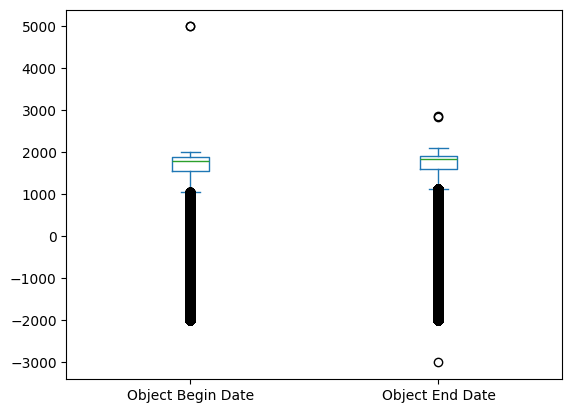

In [138]:
obj_date = df[['Object Begin Date', 'Object End Date']]
obj_date[obj_date['Object Begin Date'] > -2000].plot.box() # displaying only only a subset for the sake of visibility
obj_date

Both features are definetly years, though it is not very clear what they really represent. Negatives represent years before Christ and because there is no zeroth year in gregorian calendar, we will treat zeros as missing values.

In [140]:
idx = (df['Object Begin Date'] > df['Object End Date']) & (df['Object Begin Date'] != 0) & (df['Object End Date'] != 0)
df.loc[idx, ['Object Begin Date', 'Object End Date']]

,Object Begin Date,Object End Date
Object ID,,
38468,-45,-55
44893,1300,14
55128,1861,9
107853,1875,1800
209514,1785,1779
...,...,...
586978,-664,-688
586979,-664,-688
586980,-664,-688


As we can see there are 146 samples where begin date is later than end date.

## 4. Correcting dtypes

We will inspect why pandas was not able to pick up feature's type from CSV for every column we will work on in this section.

### Gallery number

Let's check if there are some strings with other characters than digits.

In [173]:
col = df['Gallery Number']
print(f'NaNs: {col.isna().sum()}')
col[col.str.contains(r'\D', na=False)].unique().tolist() #matches all non-digit chars

NaNs: 435415


['in Great Hall', 'Petrie Ct. Café', 'on Fifth Avenue', 'Watson Library']

Non numeric records are location names. All four of them are definetly out of galleries, so we will mark them NaN.

For this column we will use pandas UInt64 type, because it supports NaN values. Floats support them too, but constraining numbers to be natural numbers reduces chances of annomalies in the future.

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: Gallery Number
Non-Null Count  Dtype 
--------------  ----- 
15048 non-null  UInt64
dtypes: UInt64(1)
memory usage: 7.9 MB


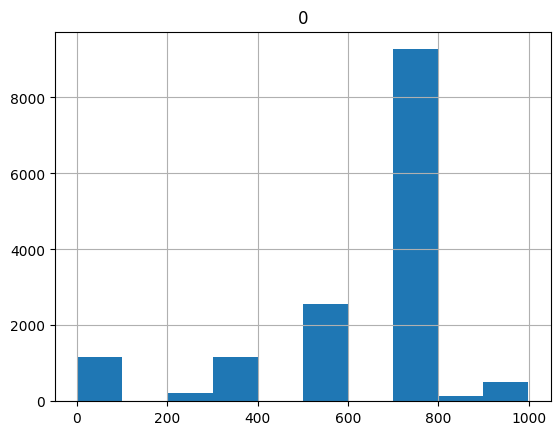

In [177]:
new_col = col.str.extract(r'(\d+)').astype('UInt64')
new_col.hist()
df['Gallery Number'] = new_col
df['Gallery Number'].info()

### Department

Departament is strictly categorical datatye. There is no ordering in departments.

In [185]:
uniq = df['Department'].unique().tolist()
print(f'Number of categories: {len(uniq)}')
display(uniq)

Number of categories: 19


['The American Wing',
 'European Sculpture and Decorative Arts',
 'Modern and Contemporary Art',
 'Arms and Armor',
 'Medieval Art',
 'Asian Art',
 'Islamic Art',
 'Costume Institute',
 'Arts of Africa, Oceania, and the Americas',
 'Drawings and Prints',
 'Greek and Roman Art',
 'Photographs',
 'Ancient Near Eastern Art',
 'Egyptian Art',
 'European Paintings',
 'Robert Lehman Collection',
 'The Cloisters',
 'Musical Instruments',
 'The Libraries']

In [189]:
df['Department'] = df['Department'].astype('category')
df['Department'].info()

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: Department
Non-Null Count   Dtype   
--------------   -----   
484956 non-null  category
dtypes: category(1)
memory usage: 4.2 MB


### City

This is a categorical column, the only thing that we will change is capitalize (make every character lowercase, except first that will be uppercase) every category.

In [334]:
df['City'] = df['City'].str.capitalize().astype('category')
display(df['City'].describe())
df['City'].info()

count     32754
unique     2611
top       Paris
freq       4658
Name: City, dtype: object

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: City
Non-Null Count  Dtype   
--------------  -----   
32754 non-null  category
dtypes: category(1)
memory usage: 20.8 MB


### Classification

This column screams to be categorized

In [336]:
df['Classification'] = df['Classification'].str.lower().astype('category')
df['Classification'].info()

count     406239
unique      1244
top       prints
freq       84326
Name: Classification, dtype: object

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: Classification
Non-Null Count   Dtype   
--------------   -----   
406239 non-null  category
dtypes: category(1)
memory usage: 20.8 MB


### AccessionYear

Let's check how this columns looks like.

In [302]:
col = df['AccessionYear']
col.value_counts()

AccessionYear
1963.0        39846
2011.0        18470
1917.0        12260
2009.0         9299
1936.0         9014
              ...  
1969-07-17        1
1969-07-10        1
1953-01-19        1
1955-05-24        1
1959-12-28        1
Name: count, Length: 316, dtype: int64

This column has two representations: standalone year and ISO date. The second problem is that year 1963 is out of UNIX datetime format, so we will use Julian datetime origin.

In [303]:
col[col.str.contains(r'\D', na=False)]

Object ID
286850    2005-02-15
504495    2022-05-20
854653    2022-02-09
855970    1953-05-28
855973    1956-08-24
882410    1978-12-12
882411    1977-08-08
882423    1980-06-18
882426    1978-03-07
889937    1963-06-17
891077    1959-10-16
891083    1960-11-15
891084    1960-06-25
891092    1961-01-10
891099    1968-12-12
891102    1966-04-29
891132    1967-08-12
891148    1967-12-04
891166    1969-07-10
891167    1969-07-17
891168    1970-09-08
891169    1970-09-08
891171    1950-07-21
891331    1967-12-04
891334    1953-01-19
891337    1955-05-24
891338    1962-10-15
891339    1962-10-15
891340    1959-12-28
891522    1950-07-21
891523    1950-07-21
891524    1950-07-21
891526    1950-07-21
891527    1950-07-21
891528    1950-07-21
891538    1950-07-21
891539    1950-07-21
891541    1950-07-21
891552    1950-07-21
891553    1950-07-21
Name: AccessionYear, dtype: object

We can see that all non-numeric chars come from ISO format, so we will extract year from it and then convert it into datetime.

In [325]:
type(col.iat[0])

float

In [323]:
col_typed = col.str.strip().str.extract(r'^(\d+)', expand=False)
col_typed

Object ID
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
          ... 
900605    1955
900606    1977
900633    1933
900717     NaN
900748    1917
Name: AccessionYear, Length: 484956, dtype: object

### Object End Date

We will turn it into nullable integer and replace zeros with nan values for the later section.

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: Object End Date
Non-Null Count   Dtype
--------------   -----
483653 non-null  Int32
dtypes: Int32(1)
memory usage: 22.1 MB


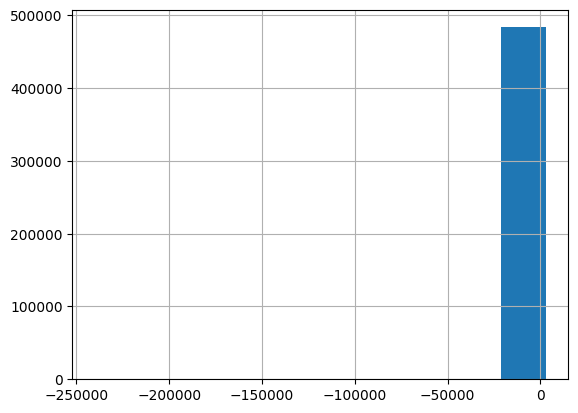

In [337]:
df['Object End Date'] = df['Object End Date'].astype('Int32').replace({0:np.nan})
df.loc[df[Object End Date] > -2000, 'Object End Date'].hist()
df['Object End Date'].info()

## 5. Outliers

We will search for outliers in "Object End Date" column. For that we will use the same metric as in boxplot.

In [343]:
col = df['Object End Date']
q = [0] * 3
for idx, p in enumerate([0.25, 0.5, 0.75]):
    q[idx] = col.quantile(p)
iqr = q[2] - q[0]
lo_bound = q[0] - 1.5*iqr
hi_bound = q[2] + 1.5*iqr
print(f'{lo_bound=}\n{hi_bound=}')
outliers = (col < lo_bound) | (hi_bound < col)
df.loc[outliers, ['Title', 'Department', 'Object End Date']]

lo_bound=np.float64(1140.0)
hi_bound=np.float64(2364.0)


,Title,Department,Object End Date
Object ID,,,
3163,Plate,The American Wing,5
22083,Seven Arrowpoints,Arms and Armor,700
22084,Lamellae of Lamellar Armor (Probably from a Co...,Arms and Armor,600
22085,Armor Fragments of Scales from a Cuirass,Arms and Armor,735
22086,Armor Fragments of Scales from a Cuirass,Arms and Armor,825
...,...,...,...
889934,Deity Head,"Arts of Africa, Oceania, and the Americas",800
889957,Burial chamber of User,Egyptian Art,-1950
890216,"Man standing, hat in his hand, in a landscape ...",Drawings and Prints,17


## 6. Detecting missing data and imputing

## 7. Cleaning 'Medium' feature

## 8. Extracting dimensions